In [12]:
import torch
import torchvision
import torchvision.transforms as T
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg

In [2]:
model = torchvision.models.vgg19(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:07<00:00, 72.3MB/s]


In [3]:
img = Image.open('/content/dog.jpg') 

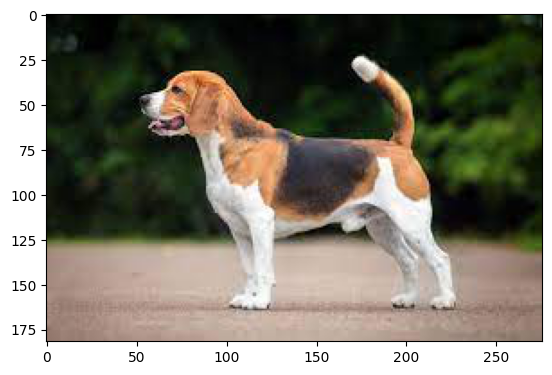

In [4]:
image = mpimg.imread('/content/dog.jpg')
plt.imshow(image)
plt.show()

In [5]:
def preprocess(image, size=224):
    transform = T.Compose([
        T.Resize((size,size)),
        T.ToTensor(),
        T.Normalize(mean=[0,0,0], std=[1,1,1]),
        T.Lambda(lambda x: x[None]),
    ])
    return transform(image)

In [7]:
X = preprocess(img)
model.eval()


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [8]:
X.requires_grad_()

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0392, 0.0039, 0.0353],
          [0.0039, 0.0000, 0.0000,  ..., 0.0471, 0.0196, 0.0510],
          [0.0078, 0.0039, 0.0039,  ..., 0.0667, 0.0392, 0.0745],
          ...,
          [0.5725, 0.5725, 0.5804,  ..., 0.5608, 0.5608, 0.5608],
          [0.5686, 0.5725, 0.5765,  ..., 0.5569, 0.5569, 0.5569],
          [0.5686, 0.5686, 0.5765,  ..., 0.5529, 0.5529, 0.5529]],

         [[0.0078, 0.0039, 0.0039,  ..., 0.1059, 0.0706, 0.1020],
          [0.0118, 0.0078, 0.0078,  ..., 0.1137, 0.0863, 0.1176],
          [0.0157, 0.0118, 0.0118,  ..., 0.1255, 0.1020, 0.1373],
          ...,
          [0.4667, 0.4667, 0.4745,  ..., 0.4824, 0.4824, 0.4824],
          [0.4627, 0.4667, 0.4706,  ..., 0.4784, 0.4784, 0.4784],
          [0.4627, 0.4627, 0.4706,  ..., 0.4745, 0.4745, 0.4745]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0314, 0.0000, 0.0275],
          [0.0000, 0.0000, 0.0000,  ..., 0.0431, 0.0157, 0.0431],
          [0.0039, 0.0039, 0.0000,  ..., 0

In [9]:
scores = model(X)
score_max_index = scores.argmax()
score_max = scores[0,score_max_index]
print(score_max_index,score_max)
score_max.backward()

tensor(167) tensor(20.2238, grad_fn=<SelectBackward0>)


tensor([[[0.0235, 0.0167, 0.0134,  ..., 0.0193, 0.0096, 0.0044],
         [0.0239, 0.0673, 0.0673,  ..., 0.0252, 0.0134, 0.0104],
         [0.0271, 0.0714, 0.0598,  ..., 0.0342, 0.0157, 0.0052],
         ...,
         [0.0320, 0.0728, 0.0287,  ..., 0.0155, 0.0443, 0.0224],
         [0.0137, 0.0500, 0.0147,  ..., 0.0280, 0.0275, 0.0111],
         [0.0052, 0.0413, 0.0062,  ..., 0.0364, 0.0094, 0.0050]]])


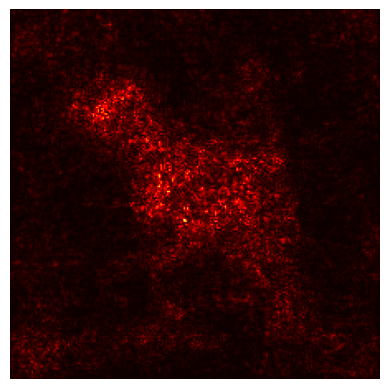

In [10]:
saliency, _ = torch.max(X.grad.data.abs(),dim=1)
print(saliency)
plt.imshow(saliency[0], cmap=plt.cm.hot)
plt.axis('off')
plt.show()